In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def ploteo(n_archivo):
    with open(n_archivo, 'r') as archivo:
        n = 0
        signal = np.array([])
        for linea in archivo:
            if n > 2:
                vec = linea.split()
                signal = np.append(signal, int(vec[8])) 
                n += 1
            else:
                n += 1
        t = np.arange(len(signal))
        fs = 1000
        ts = 1 / fs
        t = t * ts
        return t, signal

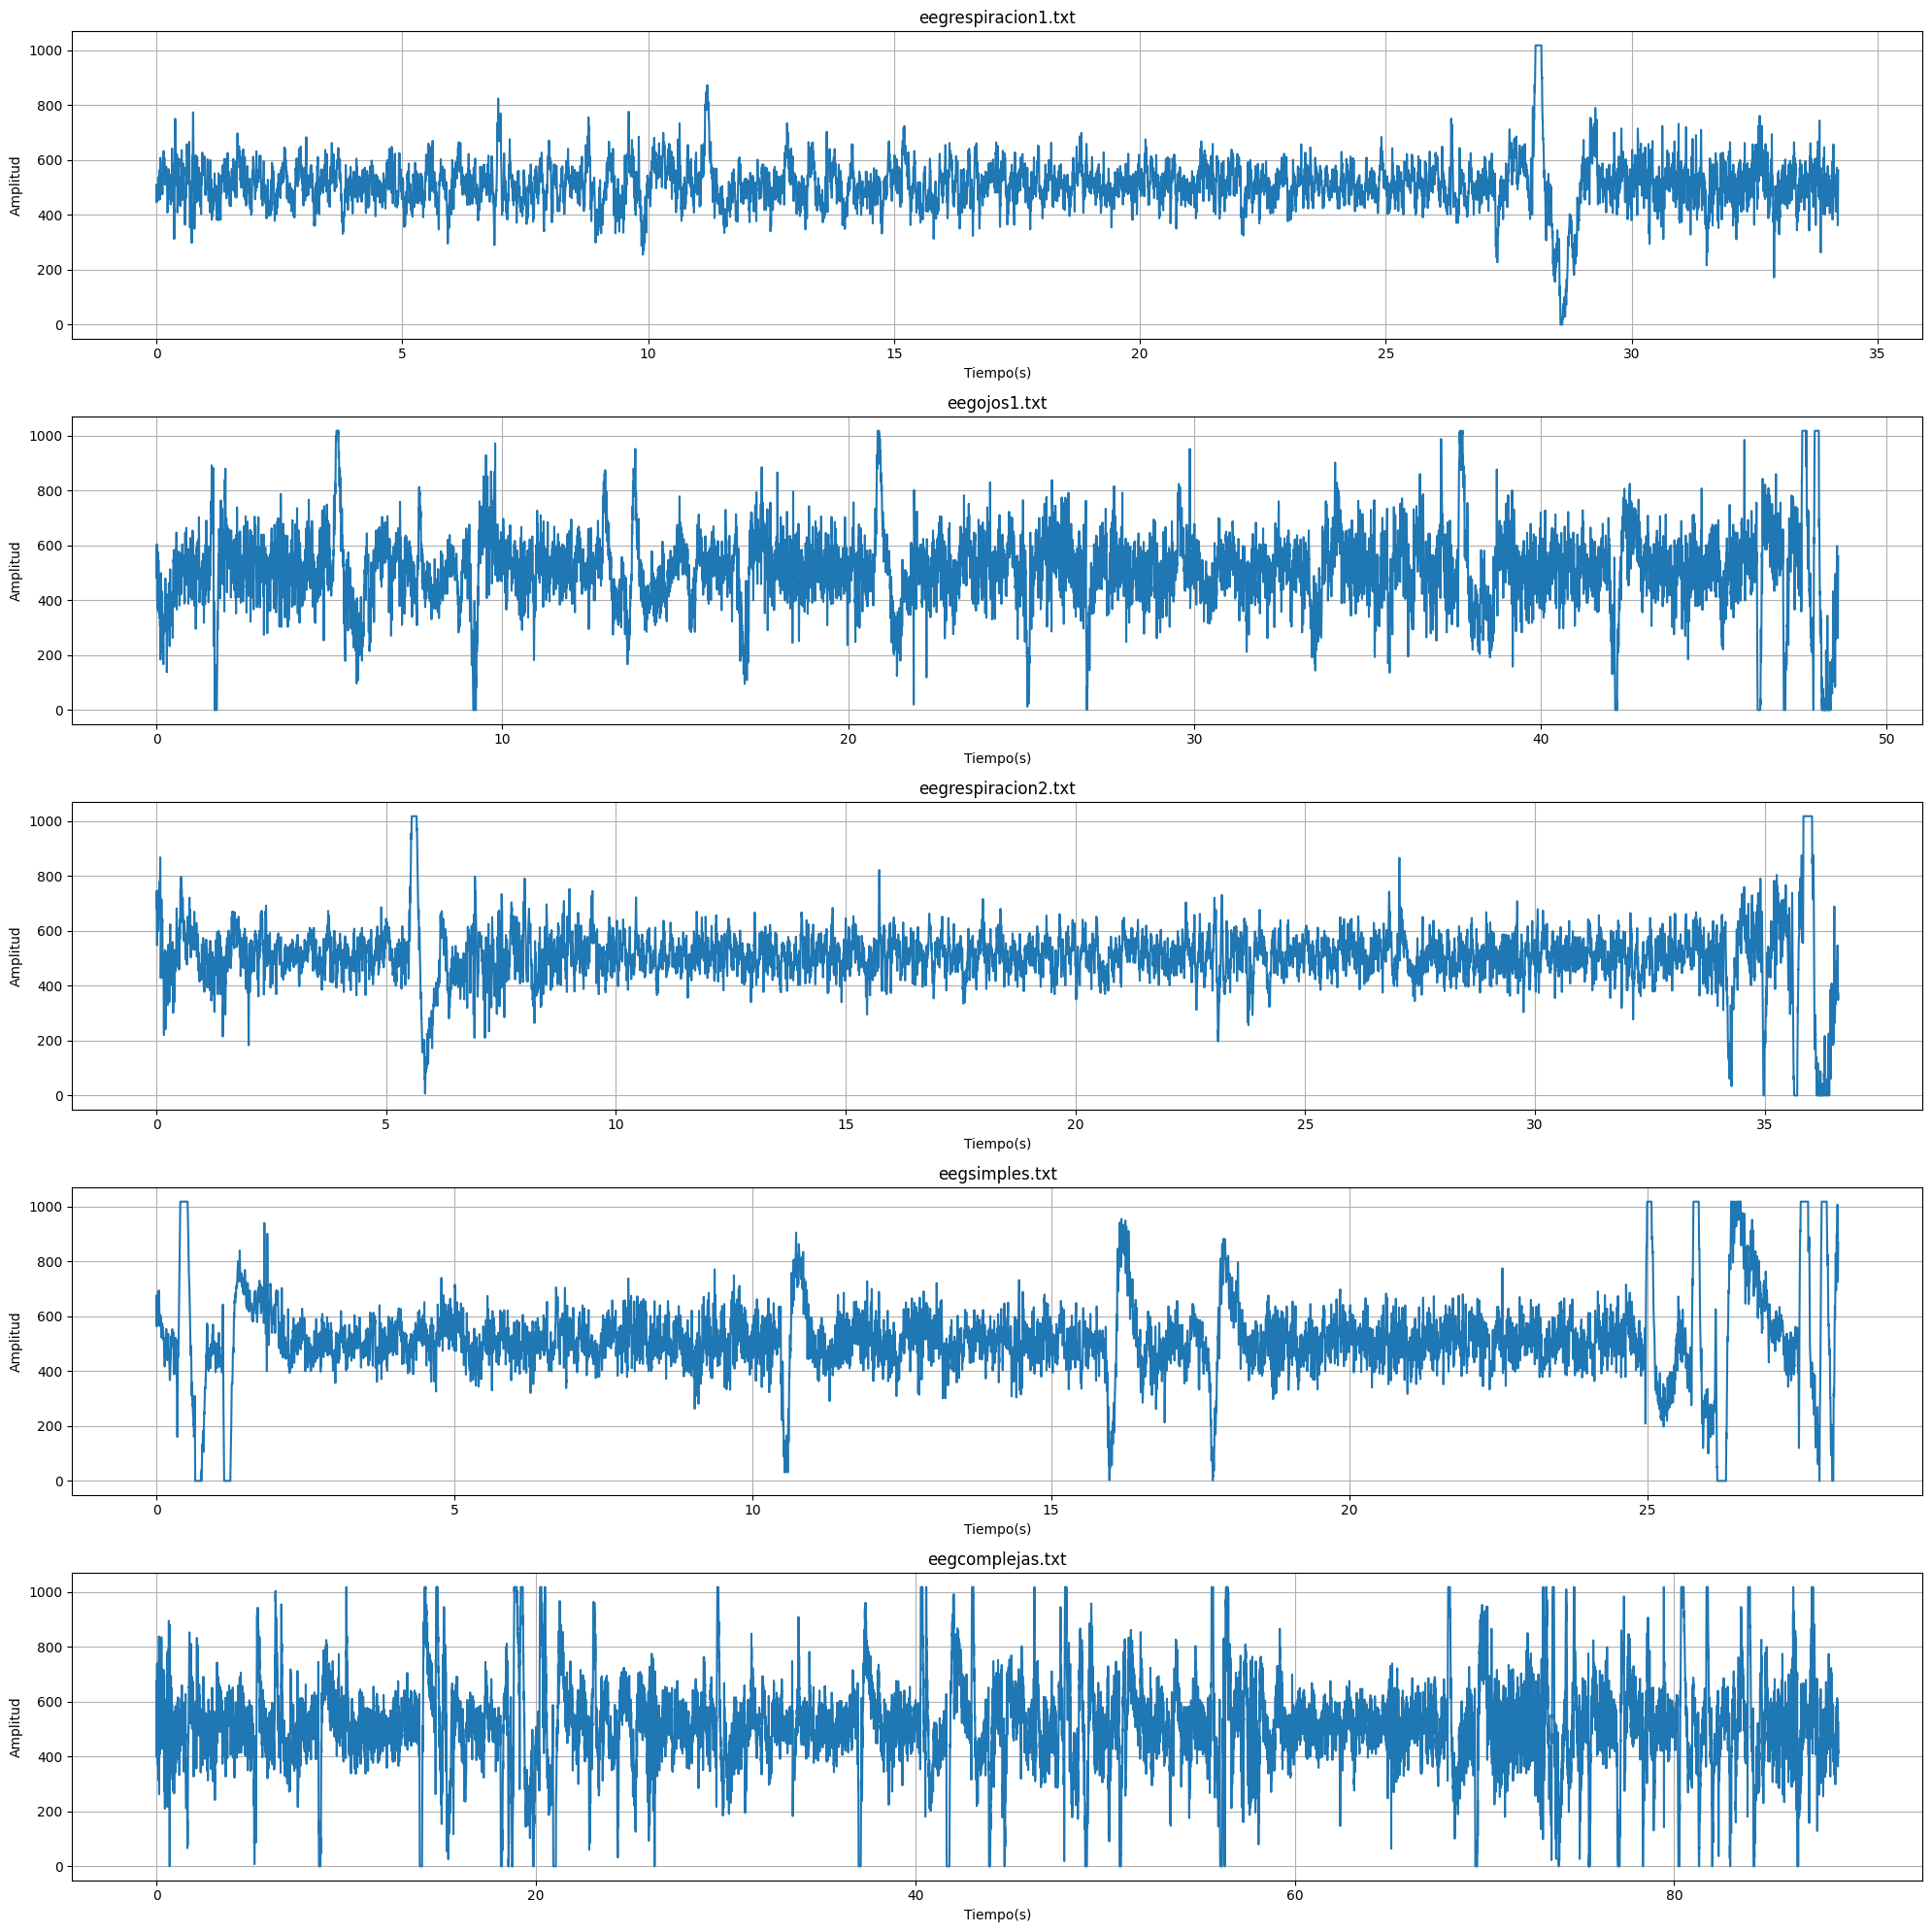

In [3]:
E1 = ["eegrespiracion1.txt", "eegojos1.txt", "eegrespiracion2.txt", "eegsimples.txt", "eegcomplejas.txt"]

# D1
fig, axs = plt.subplots(5, 1, figsize=(20, 20))
count = 0
for i in E1:
    t, signal = ploteo(i)
    axs[count].plot(t, signal)
    axs[count].set_title(i)
    axs[count].set_xlabel("Tiempo(s)")
    axs[count].set_ylabel("Amplitud")
    axs[count].grid()
    count += 1
plt.tight_layout()
plt.show()


In [4]:
def ploteo(n_archivo):
    with open(n_archivo, 'r') as archivo:
        n = 0
        signal = np.array([])
        for linea in archivo:
            if n > 2:
                vec = linea.split()
                signal = np.append(signal, int(vec[8])) 
                n += 1
            else:
                n += 1
        fs = 1000  # Frecuencia de muestreo
        ts = 1 / fs
        t = np.arange(len(signal)) * ts
        return t, signal, fs

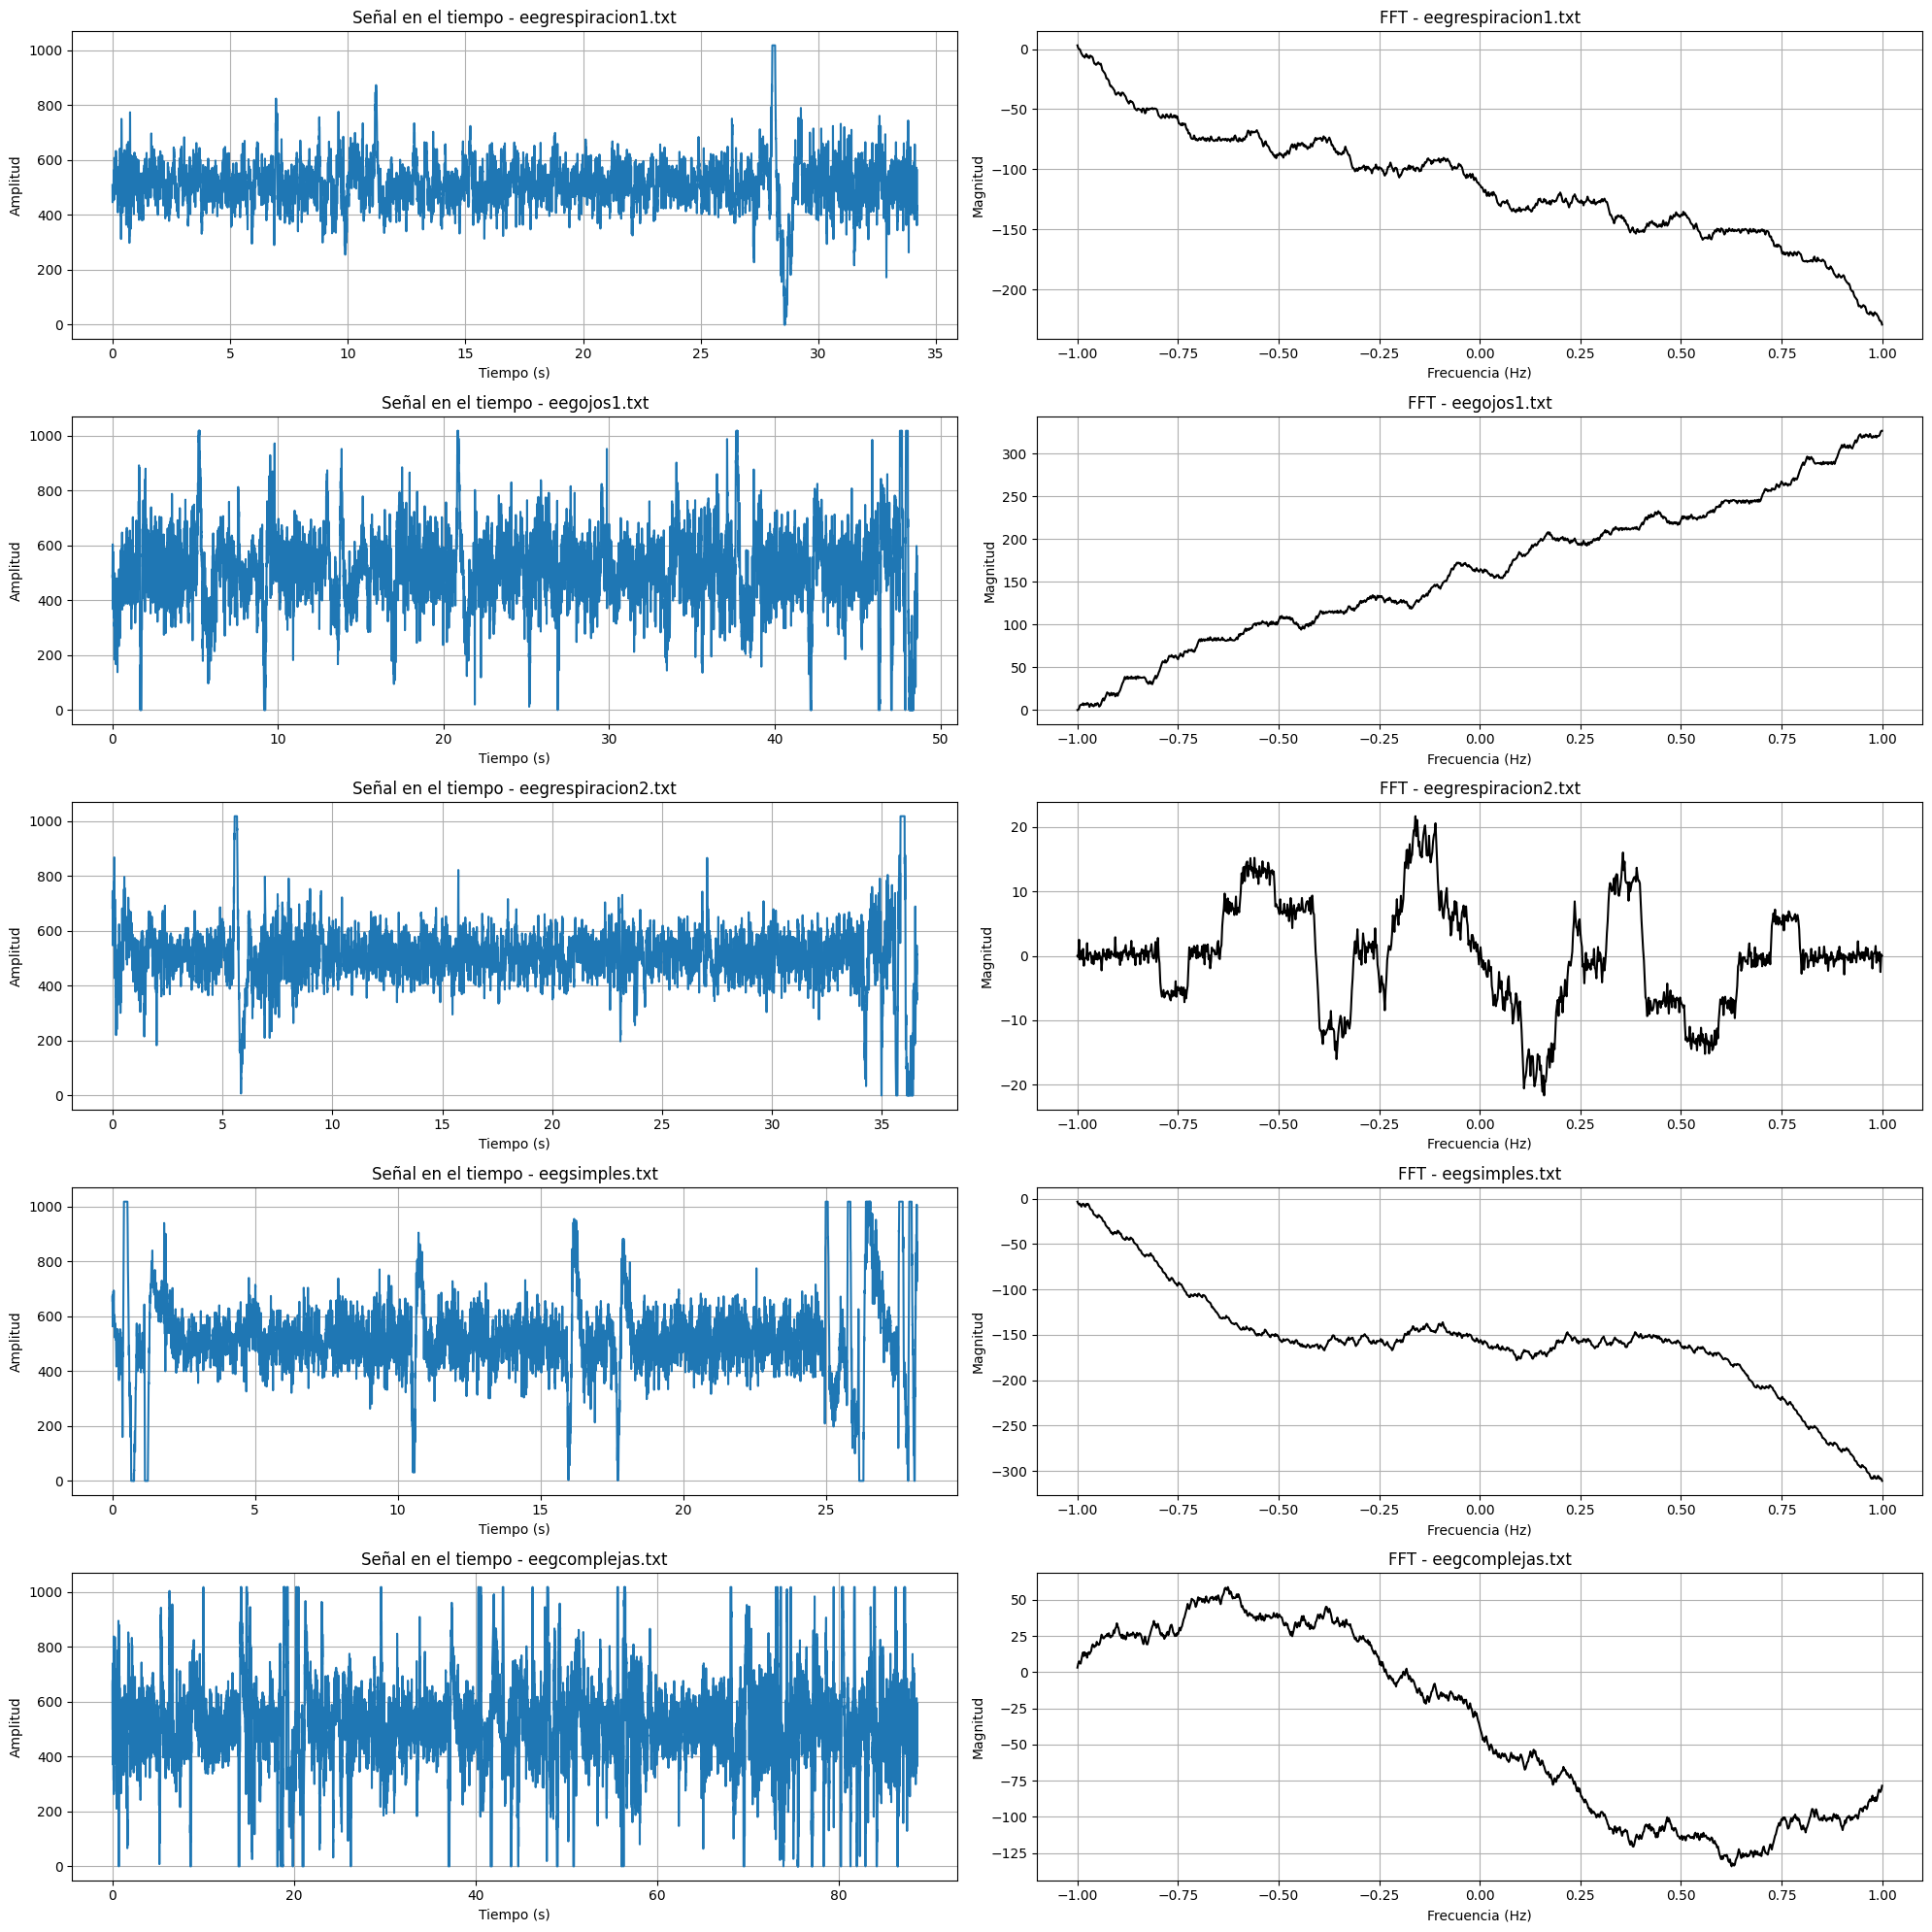

In [7]:
E1 = ["eegrespiracion1.txt", "eegojos1.txt", "eegrespiracion2.txt", "eegsimples.txt", "eegcomplejas.txt"]

fig, axs = plt.subplots(5, 2, figsize=(20, 20))  # Creamos dos columnas para tiempo y frecuencia
count = 0
for i in E1:
    t, signal, fs = ploteo(i)
    
    # Gráfico de la señal en el dominio del tiempo
    axs[count, 0].plot(t, signal)
    axs[count, 0].set_title(f"Señal en el tiempo - {i}")
    axs[count, 0].set_xlabel("Tiempo (s)")
    axs[count, 0].set_ylabel("Amplitud")
    axs[count, 0].grid()
    
    # FFT de la señal
    n=np.arange(len(signal))
    M = 500;k = np.arange(-M, M+1);w = (np.pi/500)*k

    X =  signal @ np.exp(-1j*np.outer(n,w))

    
    # Magnitud de la FFT
    fft_magnitude = np.abs(X)
    
    # Graficamos la magnitud de la FFT
    axs[count, 1].plot(w/np.pi, np.unwrap(np.angle(X)), "k")  # Graficamos solo la mitad de las frecuencias
    axs[count, 1].set_title(f"FFT - {i}")
    axs[count, 1].set_xlabel("Frecuencia (Hz)")
    axs[count, 1].set_ylabel("Magnitud")
    axs[count, 1].grid()
    
    count += 1

plt.tight_layout()
plt.show()